# Systems Security Project   

## Malware Classification using ML - 02/02 (CNN model using grayscale images)

Rachel Fanti Coelho Lima

Dataset: Malware Images: Visualization and Automatic Classification.
http://dl.acm.org/citation.cfm?id=2016908.![image-2.png](attachment:image-2.png)
    
Data: Jun/2021

### Libraries

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, roc_curve, auc

In [73]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.layers import Input

In [74]:
import warnings
warnings.filterwarnings("ignore")

### Reading data

In [75]:
#Generating DataSet 64 x 64 x 1
path_root = "malimg_paper_dataset_imgs\\"
    
batches = ImageDataGenerator().flow_from_directory(directory=path_root, color_mode = 'grayscale', target_size=(64,64), batch_size=10000)
imgs, labels = next(batches)

Found 9339 images belonging to 25 classes.


In [77]:
families = [family for family in os.listdir(path_root)]
len (families)

25

In [78]:
print (imgs.shape)
print (labels.shape)
num_class = labels.shape

(9339, 64, 64, 1)
(9339, 25)


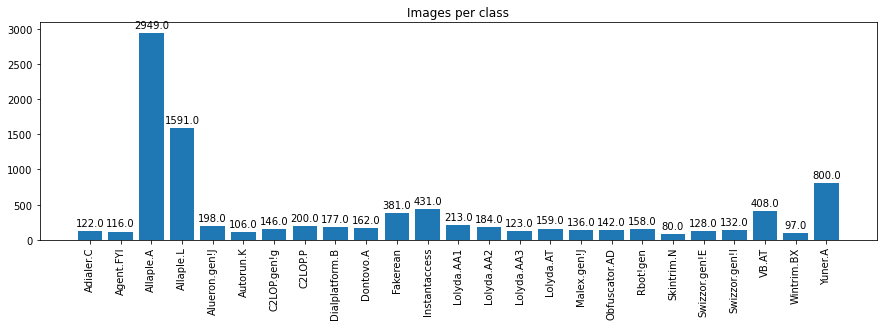

In [79]:
fig,ax = plt.subplots(1, figsize=(15,4)) # necessary to create an ax to plot labels
#plt.figure(figsize=(10,4)) 
plt.title('Images per class')
plt.bar(range(1,labels.shape[1]+1),labels.sum(axis=0))
plt.xticks(range (1,26), families, rotation=90)
for p in ax.patches:
        ax.annotate('{0}'.format(round(p.get_height(),0)), (p.get_x() + p.get_width()/2, p.get_height()), 
                    xytext=(0, 3),  textcoords="offset points", ha='center', va='bottom');

### Splitting data into train/ val and test sets

In [81]:
#Split into train and test
X_train, X_aux, y_train, y_aux = train_test_split(imgs/255., labels, test_size=0.4, stratify=labels, random_state=1)

In [82]:
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, test_size=0.5, stratify=y_aux, random_state=1)

In [83]:
print (X_train.shape)
print (X_val.shape)
print (X_test.shape)

(5603, 64, 64, 1)
(1868, 64, 64, 1)
(1868, 64, 64, 1)


### Dealing with unbalanced data (CNN)

In [87]:
num_classes = 25 #rachel

y_train_new = np.argmax(y_train, axis=1)
print (y_train_new)

#Deal with unbalanced Data
weights = class_weight.compute_class_weight('balanced', np.unique(y_train_new), y_train_new)
weights_dict = dict(enumerate(weights))

print (weights)

[10  2 24 ...  3  5  2]
[3.07013699 3.20171429 0.12669305 0.23492662 1.88336134 3.501875
 2.54681818 1.86766667 2.11433962 2.31051546 0.97868996 0.86868217
 1.7509375  2.03745455 3.02864865 2.35915789 2.73317073 2.63670588
 2.35915789 4.66916667 2.91064935 2.83696203 0.91477551 3.86413793
 0.46691667]


### Convolutional Neural Network (CNN) - Basic

In [88]:
def Malware_model_CNN(num_classes):
    
    malware_model = Sequential()
    malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,1)))
    malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    malware_model.add(Dropout(0.25))
    malware_model.add(Flatten())
    malware_model.add(Dense(128, activation='relu'))
    malware_model.add(Dropout(0.5))
    malware_model.add(Dense(50, activation='relu'))
    malware_model.add(Dense(num_classes, activation='softmax'))
    malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    
    return malware_model

### Training the model and test

In [91]:
 #Train and test our model                        
model_cnn = Malware_model_CNN(num_classes)
model_cnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, class_weight= weights_dict)
scores_cnn = model_cnn.evaluate(X_test, y_test)

Epoch 1/10
176/176 [==============================] - 11s 61ms/step - loss: 2.3938 - accuracy: 0.2633 - val_loss: 1.2888 - val_accuracy: 0.6558
Epoch 2/10
176/176 [==============================] - 11s 63ms/step - loss: 0.9649 - accuracy: 0.5006 - val_loss: 0.8802 - val_accuracy: 0.7211
Epoch 3/10
176/176 [==============================] - 11s 62ms/step - loss: 0.7215 - accuracy: 0.5508 - val_loss: 0.7725 - val_accuracy: 0.7934
Epoch 4/10
176/176 [==============================] - 11s 61ms/step - loss: 0.6384 - accuracy: 0.5881 - val_loss: 0.9023 - val_accuracy: 0.7088
Epoch 5/10
176/176 [==============================] - 10s 59ms/step - loss: 0.5433 - accuracy: 0.6347 - val_loss: 0.5874 - val_accuracy: 0.7334
Epoch 6/10
176/176 [==============================] - 10s 59ms/step - loss: 0.4713 - accuracy: 0.6704 - val_loss: 0.7198 - val_accuracy: 0.7639
Epoch 7/10
176/176 [==============================] - 10s 59ms/step - loss: 0.4207 - accuracy: 0.7357 - val_loss: 0.4317 - val_accuracy:

In [ ]:
predict_train_cnn = model_cnn.predict(X_train)
predict_test_cnn = model_cnn.predict(X_test)

**Confusion matrix:**  
- True positives: positive tuples correctly labeled   
- True negatives: negative tuples correctly labeled   
- False positives: negative tuples incorrectly labeled   
- False negatives: positive tuples incorrectly labeled  

**Classification report:**   
- Accuracy = (TP+TN)/(TP+TN+FP+FN)   
- Precision = TP/(TP+FP)   
- Recall = TP/(TP+FN)   
- F1 - measure = 2rp/(r+p)   
- WeightedAccuracy = (Wtp*TP+Wtn*TN)/(Wtp*TP+Wtn*TN+Wfp*FP+Wfn*FN)  

**Error:**
- Mean squared error (MSE)

**Receiver Operating Characteristic (ROC) curve:** 
 - Area Under the Curve (AUC)


In [158]:
def print_confusion_matrix (y_test, predict_test, families):

    print ('Confusion matrix:')
    matrix = confusion_matrix(y_test.argmax(axis=1), predict_test.argmax(axis=1)) # argmax(axis=1) Get most likely class

    fig, ax = plt.subplots(figsize=(10,10)) 
    sns.heatmap(matrix, annot=True, fmt="d", ax = ax, vmin=0, vmax=100) 
    plt.xticks(range (1,26), families, rotation=90)
    plt.yticks(range (1,26), families, rotation=0);
    
def print_classification_report (y_test, predict_test, families):
    
    print(f'Classification Report:')
    print(classification_report(y_test.argmax(axis=1), predict_test.argmax(axis=1), target_names=families))
    print ('MSE:', round(mean_squared_error (y_test,predict_test),3))
    

def print_roc_curve (y_test, predict_test):
    
    # Compute ROC curve and ROC area for each class
    for i in range (0,25):
        fpr, tpr, thresh = roc_curve(y_test[:,i], predict_test[:,i])
        area = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='%s (area = %.2f)' % (families[i], area))
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title(f'AUC & ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.show
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


### Evaluation - Basic CNN

Confusion matrix:


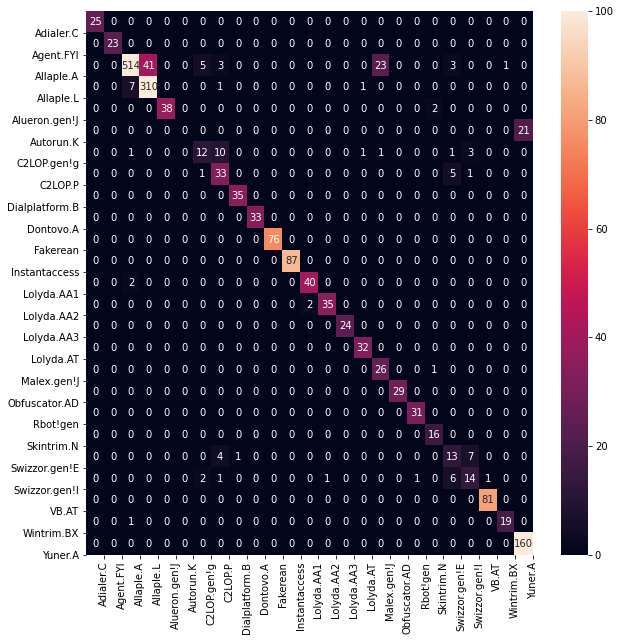

In [159]:
print_confusion_matrix (y_test, predict_test_cnn, families)

In [160]:
print_classification_report (y_test, predict_test_cnn, families)

Classification Report:
                precision    recall  f1-score   support

     Adialer.C       1.00      1.00      1.00        25
     Agent.FYI       1.00      1.00      1.00        23
     Allaple.A       0.98      0.87      0.92       590
     Allaple.L       0.88      0.97      0.93       319
 Alueron.gen!J       1.00      0.95      0.97        40
     Autorun.K       0.00      0.00      0.00        21
   C2LOP.gen!g       0.60      0.41      0.49        29
       C2LOP.P       0.63      0.82      0.72        40
Dialplatform.B       0.97      1.00      0.99        35
     Dontovo.A       1.00      1.00      1.00        33
      Fakerean       1.00      1.00      1.00        76
 Instantaccess       1.00      1.00      1.00        87
    Lolyda.AA1       0.95      0.95      0.95        42
    Lolyda.AA2       0.97      0.95      0.96        37
    Lolyda.AA3       1.00      1.00      1.00        24
     Lolyda.AT       0.94      1.00      0.97        32
   Malex.gen!J       0.5

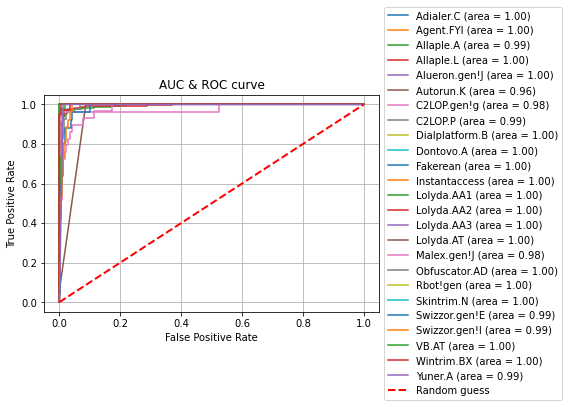

In [161]:
print_roc_curve (y_test, predict_test_cnn)